# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd  

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [6]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

print("male height mean:", male_df.Height.mean())
print("male height standard dev:", male_df.Height.std())

print("male weight mean:", male_df.Weight.mean())
print("male weight standard dev:", male_df.Weight.std())

print("female height mean:", female_df.Height.mean())
print("female height standard dev:", female_df.Height.std())

print("female weight mean:", female_df.Weight.mean())
print("female weight standard dev:", female_df.Weight.std())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

male height mean: 69.02634590621741
male height standard dev: 2.863362228660647
male weight mean: 187.0206206581932
male weight standard dev: 19.7811545167638
female height mean: 63.70877360342507
female height standard dev: 2.696284015765054
female weight mean: 135.86009300746835
female weight standard dev: 19.022467805319028


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

C:\Users\akt31\Anaconda3-reboot\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


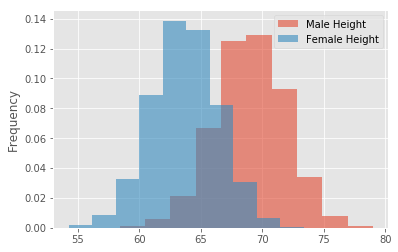

In [8]:
binsize=10
male_df.Height.plot.hist(bins = binsize, normed = True,  alpha = 0.6, label ="Male Height")
female_df.Height.plot.hist(bins = binsize, normed = True, alpha = 0.6, label = "Female Height")
plt.legend()
plt.show()

 *Record your observations - are these inline with your personal observations?*
- Both heights are normally distributed.
- Mens tend to be taller than women.
- Both plots have similar peaks, but the male graph is slightly 
flatter than the female graph, which suggests a wider spread in the male graph. 
- The common area between both graphs is around 60-70 inches, with most common values falling between 65 and 68 inches.


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

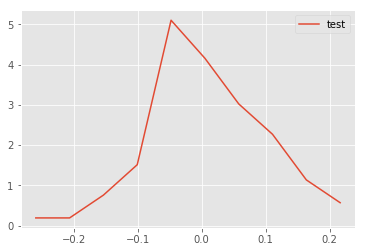

In [9]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    for k in range(n.size):  #mid point
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

C:\Users\akt31\Anaconda3-reboot\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


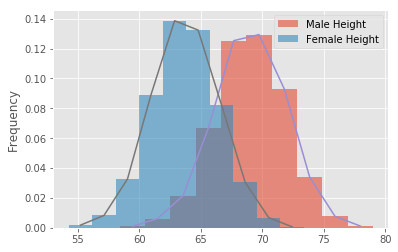

In [10]:
# You code here 
male_df.Height.plot.hist(bins = binsize, normed = True,  alpha = 0.6, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, normed = True, alpha = 0.6, label = "Female Height");
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

#### Repeat above exerice for male and female weights

C:\Users\akt31\Anaconda3-reboot\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


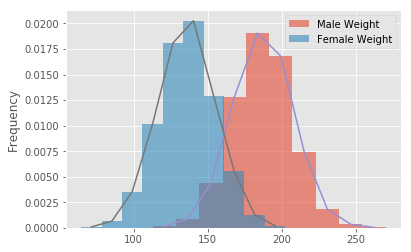

In [11]:
# Your code here 
male_df.Weight.plot.hist(bins = binsize, normed = True,  alpha = 0.6, label ="Male Weight");
female_df.Weight.plot.hist(bins = binsize, normed = True, alpha = 0.6, label = "Female Weight");
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

#### Write your observations in the cell below.

*Record your observations - are these inline with your personal observations?*
- The height and weight charts so similar characteristics. 
- They are both normally distributed with a little bit of overlap between male and female data.
- Men are generally taller and heavier than women. 
- Most men appear to be around 70" and weigh around 180lbs, whereas
 most women appear to be around 63 inches and weigh around 140lbs.


*So whats the takeaway when comparing male and female heights and weights *
- There is less overlap between male and female weights, so it is a more reliable
measure for distinguishing males and females. 



#### Repeat Above experiments in seaborn and compare with your results. 

C:\Users\akt31\Anaconda3-reboot\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


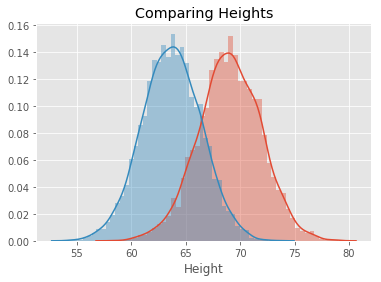

In [12]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

C:\Users\akt31\Anaconda3-reboot\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


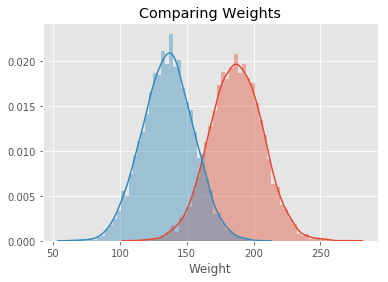

In [13]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
 - The two different approaches yield similar results, 
    although the seaborn plot appears to use a high bin number, which yields more granularity.

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.